> 기말고사

In [26]:
import torch 
import matplotlib.pyplot as plt

## `1`. hi?hello!! (90점)

아래와 같은 데이터가 있다고 하자. 

In [27]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [28]:
txt_x[:5], txt_y[:5]

(['h', 'i', '?', 'h', 'e'], ['i', '?', 'h', 'e', 'l'])

`txt_x`와 `txt_y`를 이용하여 아래와 같은 순서로 다음문자를 예측하고 싶은 신경망을 설계하고 싶다.

`h` $\to$ `i` $\to$ `?` $\to$ `h` $\to$ `e` $\to$ `l` $\to$ `l` $\to$ `o` $\to$ `!` $\to$ `!` $\to$ `h` $\to$ `i` $\to$ `?` $\to$ `h` $\to$ `e` $\to$ $\dots$

***(1)-(6)*** 의 풀이에 공통적으로 필요한 과정 정리 

In [29]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

`(1)` `torch.nn.RNN()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

(풀이)

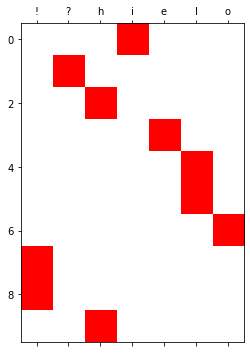

In [30]:
rnn = torch.nn.RNN(7,8).to("cuda:0")
linr = torch.nn.Linear(8,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,8).to("cuda:0")
for epoc in range(500):
    ## 1
    hidden, hT = rnn(x)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(7),labels=['!','?','h','i','e','l','o']);

`(2)` `torch.nn.RNNCell()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

In [31]:
torch.manual_seed(12345)
rnn = torch.nn.RNNCell(7,8).to("cuda:0")

In [32]:
torch.manual_seed(12345)
lnr = torch.nn.Linear(8,7).to("cuda:0")

In [33]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(lnr.parameters()))

In [34]:
T = len(x) 
for epoc in range(10): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,8).to("cuda:0")
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnn(xt,ht) 
        ot = lnr(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [35]:
yhat2 = soft(lnr(ht))
yhat2

tensor([[0.1380, 0.1367, 0.1922, 0.1178, 0.1529, 0.1191, 0.1433]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

`(3)` `torch.nn.Module`을 상속받은 클래스를 정의하고 (2)의 결과와 동일한 적합값이 나오는 신경망을 설계한 뒤 학습하라. (초기값을 적절하게 설정할 것) 

- class를 이용하지 않으면 점수없음. 
- torch.nn.RNN(), torch.nn.RNNCell() 을 이용한 네트워크를 학습시킬시 점수 없음. (초기값을 셋팅하는 용도로는 torch.nn.RNN(), torch.nn.RNNCell()을 코드에 포함시키는 것이 가능) 

In [36]:
torch.manual_seed(12345)
rnn2 = torch.nn.RNNCell(7,8).to("cuda:0")

In [37]:
class rNN3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(7,8).to("cuda:0")
        self.h2h = torch.nn.Linear(8,7).to("cuda:0")
        self.tanh = torch.nn.Tanh().to("cuda:0")
    def forward(self,x,hidden):
        hidden = self.tanh(self.i2h(x)+self.h2h(hidden)).to("cuda:0")
        return hidden

In [38]:
torch.manual_seed(12345)
_rnn2 = rNN3()

In [39]:
_rnn2.i2h.weight.data =rnn2.weight_ih.data
_rnn2.h2h.weight.data = rnn2.weight_hh.data
_rnn2.h2h.bias.data  = rnn2.bias_hh.data
_rnn2.i2h.bias.data  = rnn2.bias_ih.data

In [40]:
torch.manual_seed(12345)
lnr = torch.nn.Linear(8,7).to("cuda:0")

In [41]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnn2.parameters())+list(lnr.parameters()))

In [42]:
T = len(x) 
for epoc in range(10): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,8).to("cuda:0")
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = _rnn2(xt,ht) 
        ot = lnr(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [43]:
yhat3 = soft(lnr(ht))
yhat3

tensor([[0.1274, 0.1450, 0.1890, 0.1201, 0.1599, 0.1185, 0.1400]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

`(4)` `torch.nn.LSTM()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

(풀이)

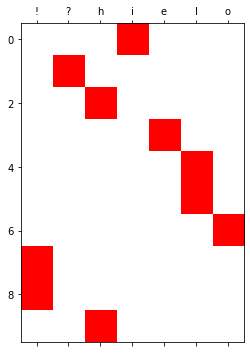

In [44]:
lstm = torch.nn.LSTM(7,4).to("cuda:0")
linr = torch.nn.Linear(4,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,4).to("cuda:0")
for epoc in range(500):
    ## 1
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(7),labels=['!','?','h','i','e','l','o']);

`(5)` `torch.nn.LSTMCell()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

In [45]:
torch.manual_seed(12345) 
lstm_cell = torch.nn.LSTMCell(7,4) .to("cuda:0")
linr = torch.nn.Linear(4,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [46]:
T = len(x) 
for epoc in range(10):
    ht = torch.zeros(1,4).to("cuda:0")
    ct = torch.zeros(1,4).to("cuda:0")
    loss = 0 
    ## 1~2
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht,ct = lstm_cell(xt,(ht,ct))
        ot = linr(ht) 
        loss = loss + loss_fn(ot,yt)
    loss = loss / T
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [47]:
ht,ct 

(tensor([[-0.0680,  0.5261, -0.2500, -0.0639]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.3395,  0.8505, -0.3683, -0.3044]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`(6)` (5)의 결과와 동일한 적합값을 출력하는 신경망을 직접설계한 뒤 학습시켜라. (초기값을 적절하게 설정할 것) 

- class를 이용하지 않아도 무방함. 
- torch.nn.LSTM(), torch.nn.LSTMCell() 을 이용한 네트워크를 학습시킬시 점수 없음. (초기값을 셋팅하는 용도로는 torch.nn.LSTM(), torch.nn.LSTMCell()을 코드에 포함시키는 것이 가능) 

In [48]:
lstm2 = torch.nn.LSTM(4,7).to("cuda:0")

In [49]:
class lSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ht = torch.zeros(1,7).to("cuda:0")
        ct = torch.zeros(1,7).to("cuda:0")
           
        self.i2h = torch.nn.Linear(7,8).to("cuda:0")
        self.h2h = torch.nn.Linear(8,7).to("cuda:0")
        self.tanh = torch.nn.Tanh().to("cuda:0")
        self.sig = torch.nn.Sigmoid().to("cuda:0")
        
    def forward(self,x, hidden):
        self._ifgo = x @ self.i2h(x) + hidden @ self.h2h(hidden)
        self.input_gate = self.sig(self._ifgo[:,0:2])
        self.forget_gate = self.sig(self._ifgo[:,2:4])
        self.gt = self.tanh(self._ifgo[:,4:6])
        self.output_gate = self.sig(self._ifgo[:,6:8])
        ct = self.forget_gate * ct + self.input_gate * gt
        ht = self.output_gate * self.tanh(ct)
             
        hidden = self.tanh(self.i2h(x)+self.h2h(hidden)).to("cuda:0")
        return hidden

In [50]:
torch.manual_seed(12345)
_lstm2 = lSTM()

In [ ]:
_lstm2.weight_hh.data  = lstm2.weight_hh_l0.data
_lstm2.bias_hh.data = lstm2.bias_hh_l0.data
_lstm2.weight_ih.data  = lstm2.weight_ih_l0.data
_lstm2.bias_ih.data  = lstm2.bias_ih_l0.data

In [ ]:
torch.manual_seed(12345)
lnr = torch.nn.Linear(7,4).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm2.parameters()) + list(linr.parameters()), lr=0.1) 

In [ ]:
_water = torch.zeros(4,7).to("cuda:0")
for epoc in range(1000): 
    ## step1 
    hidden, (ht,ct) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## step2
    loss = loss_fn(output,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad() 

In [ ]:
ht,ct

## `2`. 다음을 읽고 참 거짓을 판단하여라. (10점) 

`(1)` RNN은 LSTM에 비하여 장기기억에 유리하다.

참

`(2)` `torch.nn.Embedding(num_embeddings=2,embedding_dim=1)`와 `torch.nn.Linear(in_features=1,out_features=1)`의 학습가능한 파라메터수는 같다.

거짓

`(3)`아래와 같은 네트워크를 고려하자.

```python
net = torch.nn.Linear(1,1)
```

차원이 (n,1) 인 임의의 텐서에 대하여 net(x)와 net.forword(x)의 출력결과는 같다.

참

`(4)` 아래와 같이 a,b,c,d 가 반복되는 문자열이 반복되는 자료에서 다음문자열을 맞추는 과업을 수행하기 위해서는 반드시 순환신경망의 형태로 설계해야만 한다.

a,b,c,d,a,b,c,d,...

거짓

`(5)` RNN 혹은 LSTM 으로 신경망을 설계할 시 손실함수는 항상 torch.nn.CrossEntropyLoss 를 사용해야 한다.

거짓